In [2]:
#https://drumato.hatenablog.com/entry/2018/11/17/234633
#教書のsvmの箇所（ch3）
#https://qiita.com/kazuki_hayakawa/items/18b7017da9a6f73eba77（直線での分類）

from sklearn import datasets
import pandas as pd
df = pd.read_csv('isigaki_miyako_iriomote_wavedata_3/miyako_2006_2018.csv', header=None)

import numpy as np
from sklearn.preprocessing import LabelEncoder
#データのロード
X = df.loc[:, [1,4]].values
#print(X)
y = df.loc[:, 0].values

In [3]:
#データの分割（テスト用とトレーニング用）
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)
print('Labels counts in y[0 1]:', np.bincount(y))
print('Labels counts in y_train[0 1]:', np.bincount(y_train))
print('Labels counts in y_test[0 1]:', np.bincount(y_test))

Labels counts in y[0 1]: [4745    3]
Labels counts in y_train[0 1]: [3796    2]
Labels counts in y_test[0 1]: [949   1]


In [4]:
#標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

[[-0.26995539 -1.07000565]
 [-0.8268456  -1.08430653]
 [ 0.11986776 -0.76968714]
 ...
 [-0.49271147 -1.07000565]
 [ 0.11986776 -0.183351  ]
 [-0.60408952 -0.32635982]]


In [5]:
#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(X)

[[4.9  2.1 ]
 [5.9  1.9 ]
 [3.2  1.55]
 ...
 [7.   9.5 ]
 [6.6  9.  ]
 [5.6  9.  ]]


In [6]:
#グラフをプロットするための関数
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

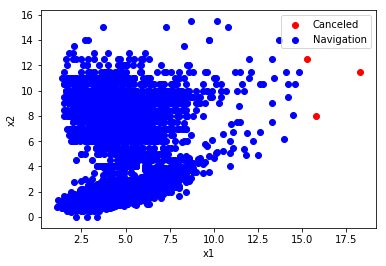

In [7]:
#風速が縦軸、波高が横軸の２つの特徴量の関係の図
import matplotlib.pyplot as plt
c=1
def plot_data(X, t):
    c=1
    positive = [i for i in range(len(t)) if t[i] == 1]
    negative = [i for i in range(len(t)) if t[i] == 0]

    plt.scatter(X[positive, 0], X[positive, c], c='red', marker='o', label='Canceled')
    plt.scatter(X[negative, 0], X[negative, c], c='blue', marker='o', label='Navigation')

# plot training data
plt.figure(1)
plot_data(X, y)

# draw decision boundary
plt.figure(1)
xmin, xmax = min(X[:, 0]), max(X[:, 0])
ymin, ymax = min(X[:, c]), max(X[:, c])
xs = np.linspace(xmin, xmax, 100)
#ys = [- (w1 / w2) * x - (b / w2) for x in xs]
#plt.plot(xs, ys, 'b-', label='decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.legend()
plt.show()

In [8]:
#SVM実行（波の高さと風速の二つの特徴量のみ）
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=1, gamma=0.7, C=1.0, probability=True)#kernel='linear'kernel='rbf'
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

In [9]:
#predict = svm.predict(X_test_std)
#print(predict)
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = svm.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.4f' % accuracy_train)
#print(y_train)
pred_test = svm.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.4f' % accuracy_test)
print(y_train)
print(pred_train)

トレーニングデータに対する正解率： 0.9995
テストデータに対する正解率： 1.0000
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


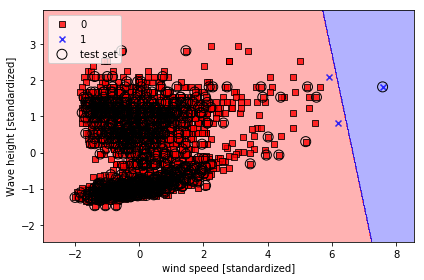

In [10]:
#SVMの結果のプロット（波の高さと風速の二つの特徴量のみ）
X_combined_std = np.vstack((X_train_std, X_test_std))#結合しているのはテストデータをランダムに取得したため
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(3798, 4748))#test_idx=range(105, 150)はテストデータの開始行数から終了行数まで
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [11]:
#SVM実行（pca処理を行った場合）
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=1, gamma=0.7, C=1.0,  probability=True)
svm.fit(X_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='linear',
  max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
  verbose=False)

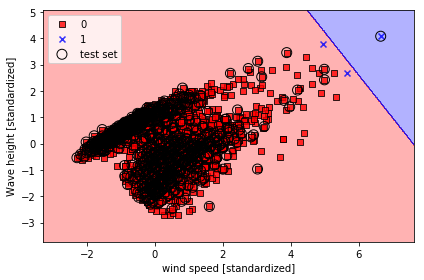

In [15]:
#SVMの結果のプロット（pca処理を行った場合）
X_combined_std = np.vstack((X_train_pca, X_test_pca))#結合しているのはテストデータをランダムに取得したため
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svm, test_idx=range(3798, 4748))#test_idx=range(105, 150)はテストデータの開始行数から終了行数まで
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [13]:
df1 = pd.read_csv('isigaki_miyako_iriomote_wavedata/test_1.csv', header=None)
X1 = df1.loc[:, 1:].values
#print(X)
y1 = df1.loc[:, 0].values
#print(y)
#y = np.where(y <= 1, 0, 1)#1は雨の合計降水量
le = LabelEncoder()
#print(y)
y1 = le.fit_transform(y1)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.02, random_state=0)
X1_train_pca = pca.fit_transform(X1)
predict = svm.predict(X1_train_pca)
predict_proba = svm.predict_proba(X1_train_pca)

#データに対する予測確率
print('データのクラス')
print(y1)
print('svmモデルによるデータのクラス予想')
print(predict)
print('データそれぞれに対するクラス[0 1]の所属解率')
print(predict_proba)

plt.figure(1)
plot_data(X1_train_pca, y1)


plot_decision_regions(X=X1_train_pca, y=y1,
                      classifier=svm, test_idx=range(3, 6))#test_idx=range(105, 150)はテストデータの開始行数から終了行数まで
plt.xlabel('wind speed [standardized]')
plt.ylabel('Wave height [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

FileNotFoundError: File b'isigaki_miyako_iriomote_wavedata/test_1.csv' does not exist